# Homework 3 : The project

Choice of the study : Fake News - dataset based on FakeNewsNet -
https://www.kaggle.com/datasets/algord/fake-news

Importing the studied dataset and displaying the first lines to get a quick overview of the data.

In [7]:
import pandas as pd
file_path = 'FakeNewsNet.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


Point of the study: 
How can we detect fakenews ?

0) Cleaning dataset so we don't get the urls
1) Proportion of fake vs real
2) Are fake news more shared than real ones ?
3) Can we judge if news are fake depending on the website ?
4) Are some websites more shared than others ? (Would also mean they might be more followed on twitter)
5) Which words are the more present in the titles ? Deduce topics (Excluding any stopword) 
6) Are some topics more shared than others ?
7) Are some topics more likely to be fake ?
8) Are titles containing insults more likely to get shared ?
9) Are titles containing ... more likely to get shared ? (I'm thinking about the too enthusiastic titles but maybe other words will come up in the study)

In [28]:
df_no_url = df.drop(columns=['news_url']).copy()
display(df_no_url.head(5))

,title,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,www.zerchoo.com,38,1


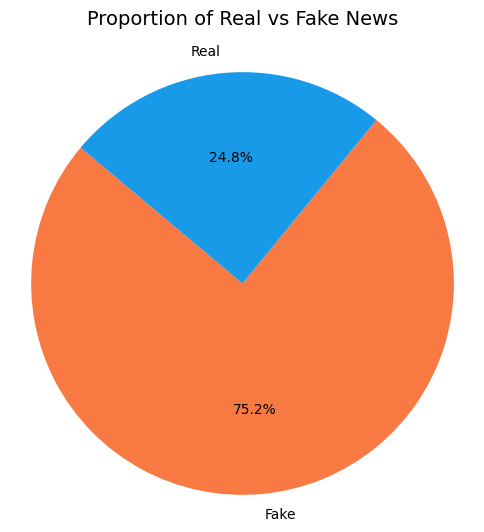

In [29]:
import matplotlib.pyplot as plt
# Count the occurrences of each value in the 'real' column
real_counts = df['real'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(real_counts, labels=['Fake', 'Real'],colors=['#F97942','#199AE9'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Real vs Fake News', pad=20, fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

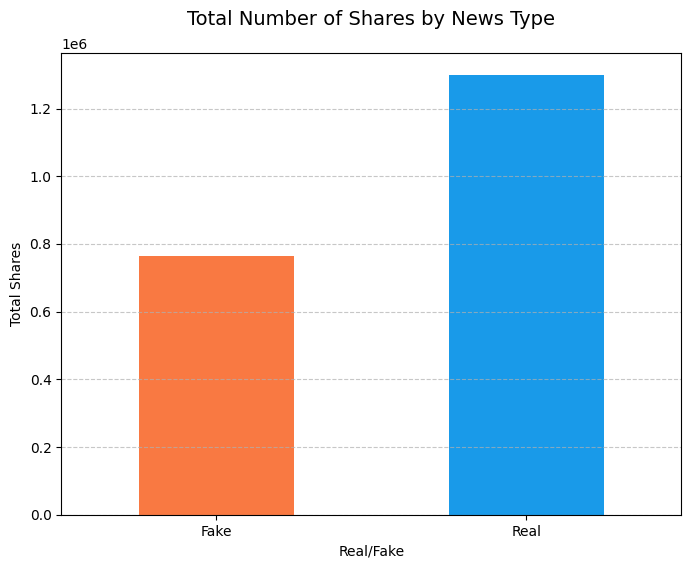

In [27]:
# Grouping by 'real' column and summing the 'shares' column
shares_by_real = df.groupby('real')['tweet_num'].sum()

# Plotting
plt.figure(figsize=(8, 6))
shares_by_real.plot(kind='bar', color=['#F97942','#199AE9'])
plt.title('Total Number of Shares by News Type', pad=20, fontsize=14)
plt.xlabel('Real/Fake')
plt.ylabel('Total Shares')
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [31]:
# Count the number of unique values in the source_domain column
num_unique_domains = df['source_domain'].nunique()

print("Number of different source domains:", num_unique_domains)


Number of different source domains: 2441


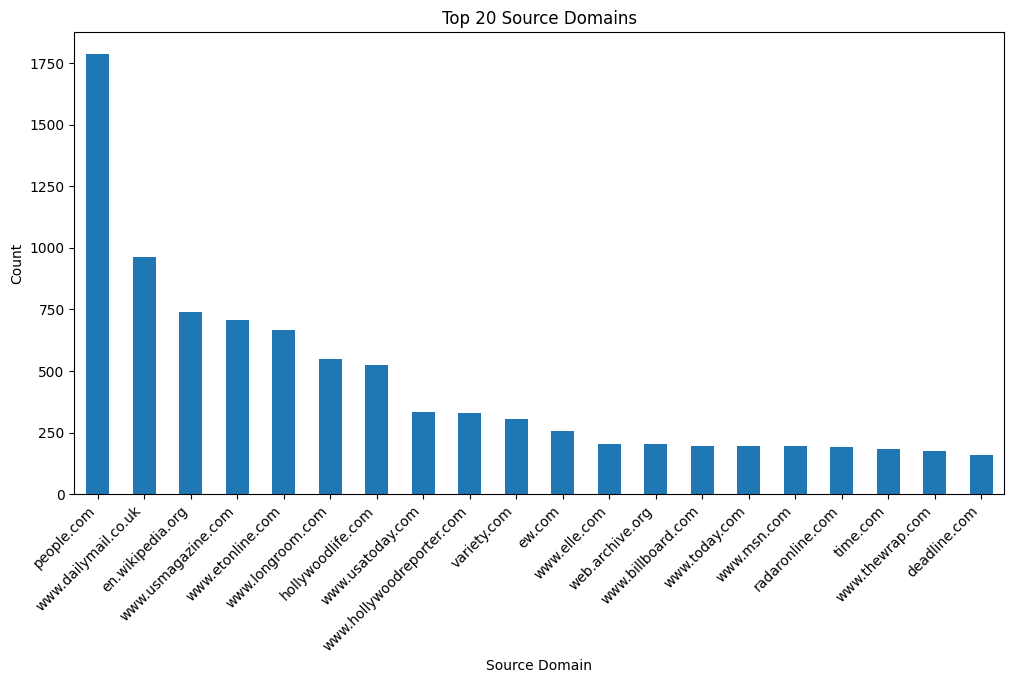

In [32]:
# Count the occurrences of each source domain
domain_counts = df['source_domain'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
top_n = 20  # Choose the top N domains to display
domain_counts.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Source Domains')
plt.xlabel('Source Domain')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


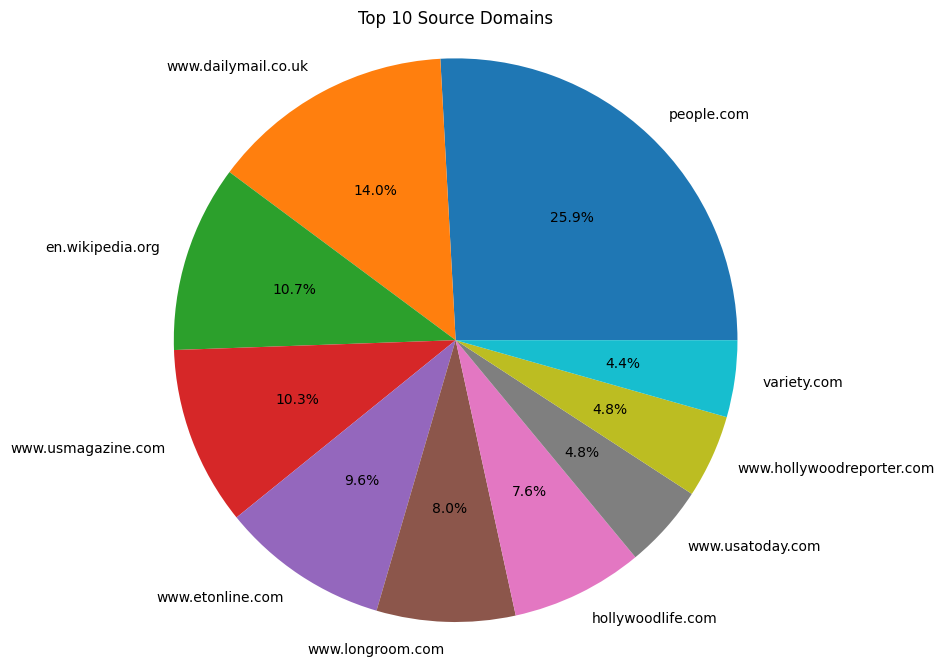

In [33]:
# Assuming df is your DataFrame containing the dataset
# And 'source_domain' column contains the domain names

# Count the occurrences of each source domain
domain_counts = df['source_domain'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
top_n = 10  # Choose the top N domains to display
labels = domain_counts.head(top_n).index.tolist()
sizes = domain_counts.head(top_n).values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title(f'Top {top_n} Source Domains')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [35]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.6 kB ? eta -:--:--
   -------------- ------------------------- 112.6/300.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.6/300.6 kB 2.6 MB/s eta 0:00:00


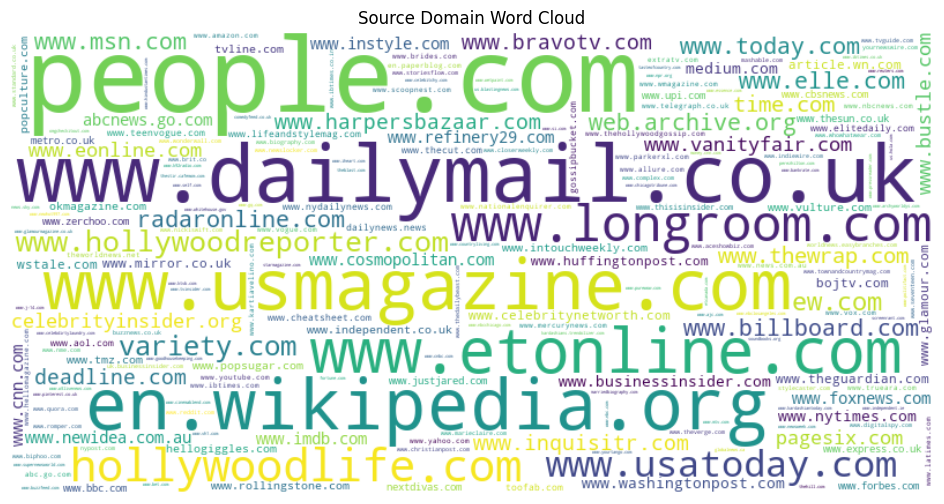

In [36]:

from wordcloud import WordCloud

# Assuming df is your DataFrame containing the dataset
# And 'source_domain' column contains the domain names

# Generate a word cloud of source domains
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(domain_counts)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Source Domain Word Cloud')
plt.axis('off')
plt.show()


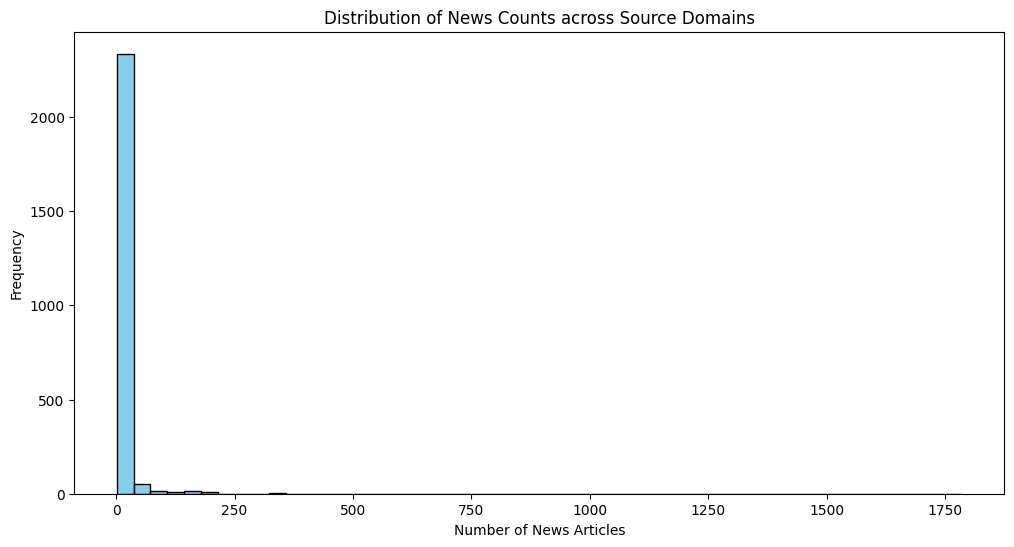

In [37]:
# Assuming df is your DataFrame containing the dataset
# And 'source_domain' column contains the domain names

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(domain_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of News Counts across Source Domains')
plt.xlabel('Number of News Articles')
plt.ylabel('Frequency')
plt.show()
